<a href="https://colab.research.google.com/github/YashrajMishra6190/CatDogImageClassifier/blob/main/Cat_Dog_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Cat and Dog Image Classifier :

## Objective
-----------
Develop an image classification model to
distinguish between images of cats and dogs
using data science techniques in Python.
## Dataset:
dogs vs cats datasets link: https://www.kaggle.com/datasets/salader/dogs-vs-cats/data
In the following dataset there are different images of dogs and cats are present.
------



`Connecting to the Kaggle and importing the dataset path to the collab.`

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 191MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## CNN MODEL
`Feeding the data by Building a CNN model.`

## Importing all important librarires

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## Generators
--------------
Now, to process Training data we use ` Generators ` concept in KERAS, which will divide the images in batches.

In [10]:
#train_dataset_generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

#test_dataset_generators or validation_dataset_generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Noramalize Image

In [11]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Creating CNN Model (Convolutional Neural Network)

In [12]:
model = Sequential()

#Layer-1: 32 Filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer-2: 64 Filters
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer-3: (128 Filters)
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #128 neurons
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu')) #64 Neurons
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid')) #32 Neurons

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

## Compiling model

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 109ms/step - loss: 1.5298 - accuracy: 0.5879 - val_loss: 0.7424 - val_accuracy: 0.5578
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5853 - accuracy: 0.6923 - val_loss: 1.3474 - val_accuracy: 0.5862
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4898 - accuracy: 0.7635 - val_loss: 0.4622 - val_accuracy: 0.7764
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4219 - accuracy: 0.8059 - val_loss: 0.4919 - val_accuracy: 0.7644
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3670 - accuracy: 0.8407 - val_loss: 0.4782 - val_accuracy: 0.7648
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2802 - accuracy: 0.8791 - val_loss: 0.9092 - val_accuracy: 0.7234
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2054 - accuracy: 0.9171 - val_loss: 0.6484 - val_ac

## Data Visualization

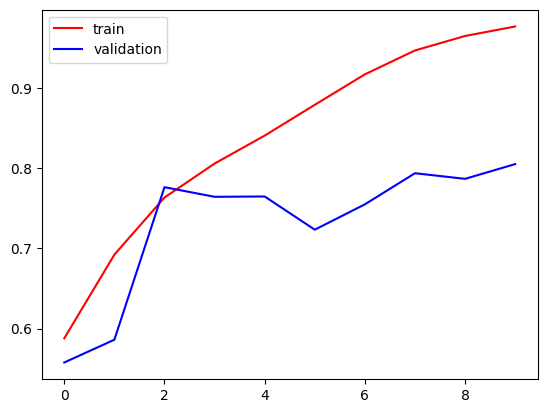

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

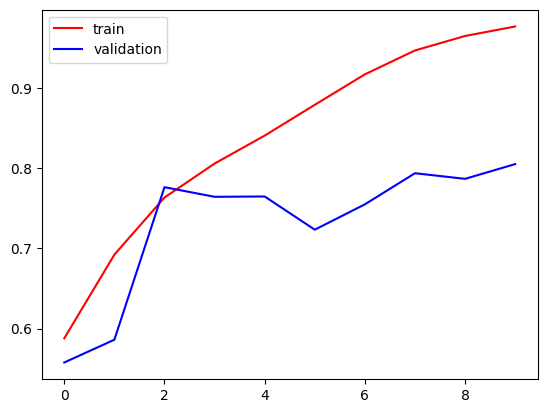

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

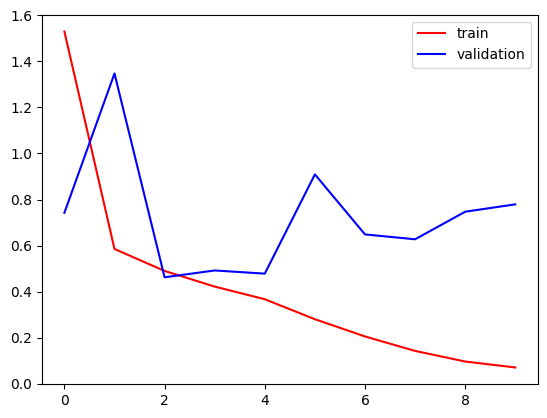

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

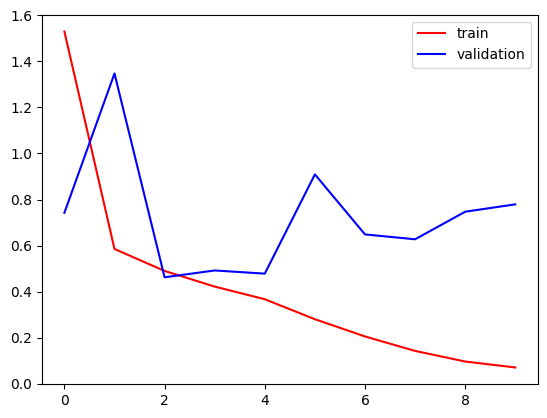

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Validating

In [22]:
import cv2

In [23]:
test_img = cv2.imread('/content/dogs.jpeg')

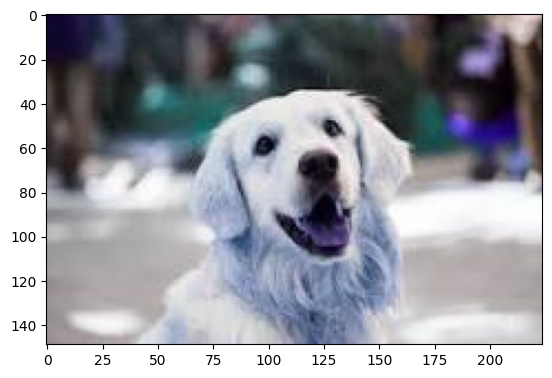

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(149, 224, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

# Conclusion:
----
Here, it predicts the above example image as 0 which is Dog with accuracy of `85%`.

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 397ms/step


array([[0.]], dtype=float32)